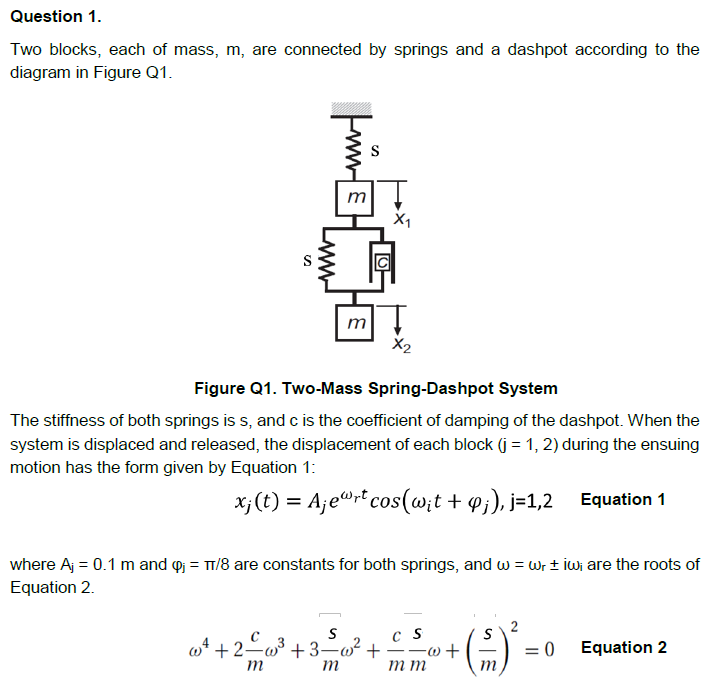

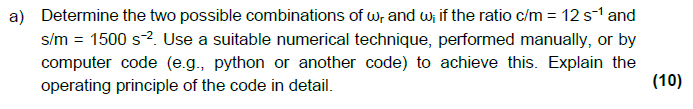

In [1]:
import numpy as np

cm = 12
sm = 1500

poly = [1, 2*cm, 3*sm, (cm)*(sm),(sm)**2]

print(np.roots(poly))


[-11.37698037+61.35447281j -11.37698037-61.35447281j
  -0.62301963+24.03024141j  -0.62301963-24.03024141j]


For a polynomial of degree n, we can generate a companion matrix A of size n x n and such that the charicteristics of its polynomial is identical to the polynomial that we intend to solve. This  means that the eigenvalues of the matrix A are the roots of its polynomial and therefore the roots of the polynomial we intend to solve.

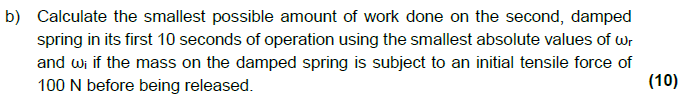

In [1]:
import scipy.integrate as integrate
import numpy as np


Aj = 0.1
phij = np.pi/8
wr = 0.62301963
wi = 24.03024141

cm = 12
sm = 1500
F = 100
s = F/Aj
m = sm/s
c = cm/m
print(m)
print(c)

# disp = lambda t: Aj*np.exp(wr*t)*np.cos(wi*t + phij)
# velo = integrate.quad(disp,0,10)
velo_fn = lambda t: Aj*(wr*np.exp(wr*t))*np.cos(wi*t + phij)-Aj*(wi*np.exp(wr*t)*np.sin(wi*t+phij))
print(velo_fn(10))

power = c*velo_fn(10)**2

print(power)




1.5
8.0
-1151.9863141489648
10616579.743892139


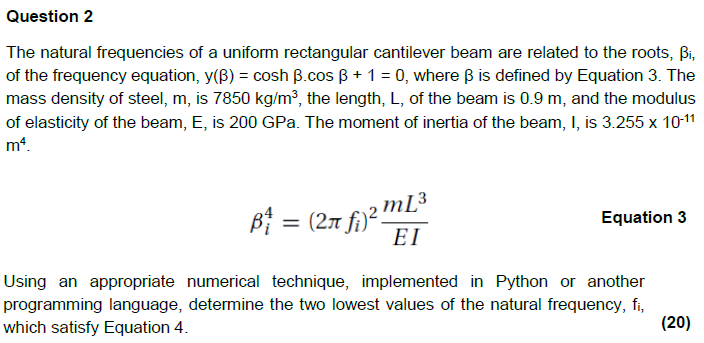

The solutions are: -1.875104068711961, 1.8751040687119611
[-1.875104068711961, 1.8751040687119611]
18.873949371935755
18.873949371935762


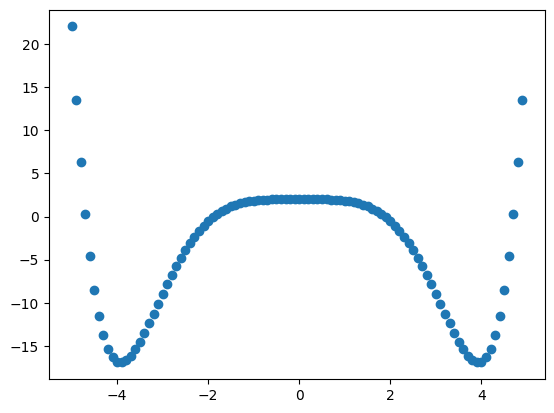

In [82]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

# fi = np.arange(0,1,0.01)
# fi = 1
m = 7850/1000000000
L = 0.9*1000
E = 200000
I = 3.255e-11*1000000000000  
B = np.arange(-5,5,0.1)
# B = [5]
# print(B)

y_val = []
y = lambda B: (np.cosh(B)*np.cos(B))+1

for i in B:
    y_val.append(y(i)) # = 0

# print(B)
# print(y_val)

plt.scatter(B,y(B))
# plt.ylim(-1000)

def false_pos(f,a,b,N):
    # f = function [manually define]
    # a, b = search interval
    # N = Number of iterations
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

solution_neg = false_pos(y,-4,0,100000)
solution_pos = false_pos(y,0,4,100000)
print(f'The solutions are: {solution_neg}, {solution_pos}')
solutions = [solution_neg, solution_pos]
print(solutions)



freq = lambda B: (np.sqrt(B**4*((E*I)/(m*L**3))))/(2*np.pi)

# for i in solutions:
#     fi = freq(i)

fi = freq(solution_neg)    
print(fi)
fi = freq(solution_pos)
print(fi)



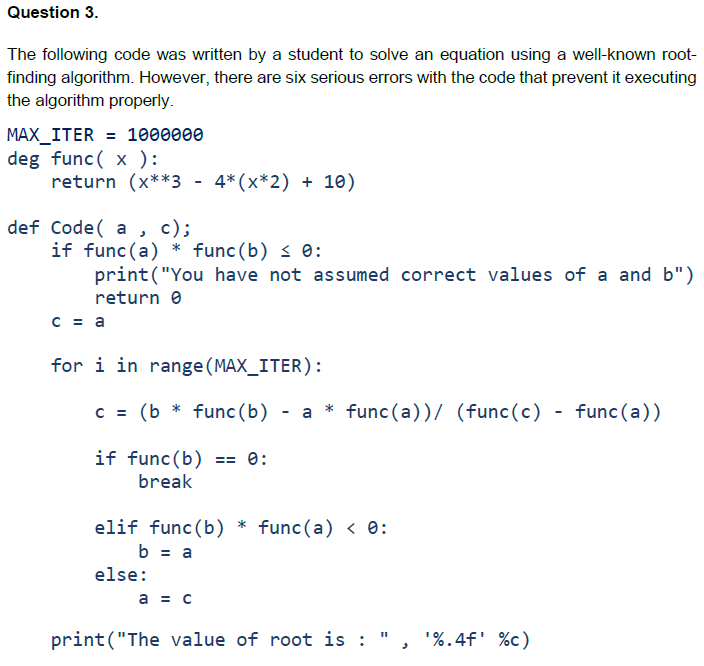

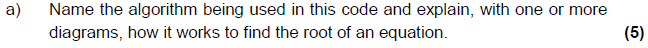

The algorithm used is the flase position method.The false position method requires a function f(x), a specified number of iterations n, and two x-values x0 and x1 to form a test range. 

The algorithm first checks that f(x0) and f(x1)

The corresponding y-values of the test range is obtained from the function f(x), and a straight line of infinite length is drawn through the two points. The x-intercept of the straight line is the next x-value and it replaces (x0), the original x-value. 

The calculations are repeated to calculate x(n+1), which replaces x(n-1). The algorithm repeats until it reaches the number of iterations n.

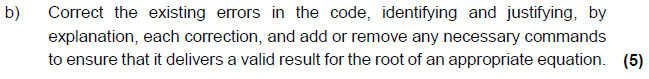

In [94]:
a = -10
b = 10
max_iter = 1000000
def func(x):
    return (x**3 - 4*(x**2) + 10)

def code(func, a, b, max_iter):
    if func(a)*func(b) >= 0:
        print("You have not assumed correct values of a and b")
        return None
    
    for i in range(1, max_iter + 1):
        m = a - func(a)*(b - a)/(func(b) - func(a))
        
        if func(a)*func(m) == 0:
            return m
             
        elif func(b)*func(m) < 0:
            a = m
            b = b
            
        elif func(a)*func(m) < 0:
            a = a
            b = m
    return a - func(a)*(b - a)/(func(b) - func(a))
            
ans = code(func, a, b, max_iter)
print(f"The value of root is: {ans}")

#Mistakes:
# 1. Spelling mistake: deg (line 2)
# 2. Missing asterisk (x**2)
# 3. Function not inserted/used into main loop
# 4. Max iteration is not used in main loop
# 5. Wrong use of variables
# 6. Print statement is printing nothing


The value of root is: -1.3652300134140898


In [55]:
a = -10
b = 0
max_iter = 100
func = lambda x: x**2 + 5*x -4

def code(func, a, b, max_iter):
    if func(a)*func(b) >= 0:
        print("You have not assumed correct values of a and b")
        return None
    
    for i in range(1, max_iter + 1):
        m = a - func(a)*(b - a)/(func(b) - func(a))
        if func(b)*func(m) < 0:
            a = m
            b = b
        
        elif func(a)*func(m) < 0:
            a = a
            b = m
             
        elif func(a)*func(m) == 0:
            return m
            
    return a - func(a)*(b - a)/(func(b) - func(a))
            
ans = code(func, a, b, max_iter)
print(f"The value of root is: {ans:4f}")

The value of root is: -5.701562


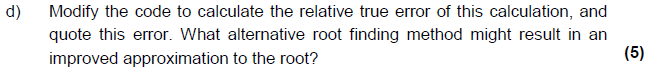

In [81]:
import numpy as np

a = [-10,0]
b = [0,10]
max_iter = 100
func = lambda x: x**2 + 5*x -4

def code(func, a, b, max_iter):
    i = 0
    output = []
    for x in a:
        if func(a[i])*func(b[i]) >= 0:
            print("You have not assumed correct values of a and b")
            return None
        
        for r in range(1, max_iter + 1):
            m = a[i] - func(a[i])*(b[i] - a[i])/(func(b[i]) - func(a[i]))
            if func(b[i])*func(m) < 0:
                a[i] = m
                b[i] = b[i]
            
            elif func(a[i])*func(m) < 0:
                a[i] = a[i]
                b[i] = m
                
            elif func(a[i])*func(m) == 0:
                return m
        output.append(a[i] - func(a[i])*(b[i] - a[i])/(func(b[i]) - func(a[i])))        
        i += 1
    return output   
    
coeffs = [1, 5, -4]
roots = np.roots(coeffs)

def errors(output):
    a = 0
    out = []
    for i in output:
        true_error = roots[a]- output[a]
        rel_true_error = true_error/roots[a]
        a += 1
        out.append(rel_true_error)
    return out
    

            
ans = code(func, a, b, max_iter)
print(f"The value of root is: {ans}")
print(f'The relative true error is {errors(ans)}')

The value of root is: [-5.701562118716423, 0.7015621187164243]
The relative true error is [1.5577808348075636e-16, 1.582501385132391e-16]


The reguar false position method converges quickly in most situations. However, the illinois method converges even faster while still guaranteeing a root. The Illinois method will halve the y-value of the retained point when it has the same sign as the previous estimate (if x1 has the same sign as x0, then the y-value of x0 will be halved when calculating x2). This guarantees superlinear convergence.

# How secant works
The algorithm used is the Secant method. The secant method requires a function f(x), a specified number of iterations n, and two x-values x0 and x1 to form a test range. 

The corresponding y-values of the test range is obtained from the function f(x), and a straight line of infinite length is drawn through the two points. The x-intercept of the straight line is the next x-value and it replaces (x0), the original x-value. 

The calculations are repeated to calculate x(n+1), which replaces x(n-1). The algorithm repeats until it reaches the number of iterations n.

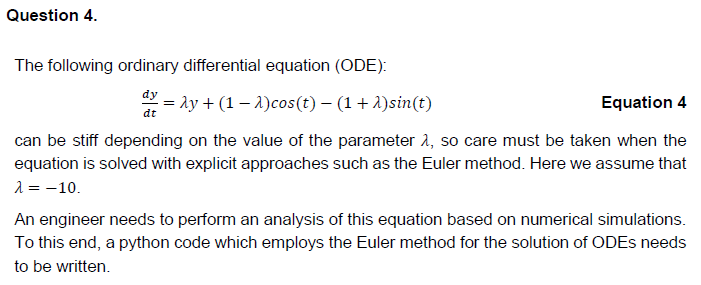

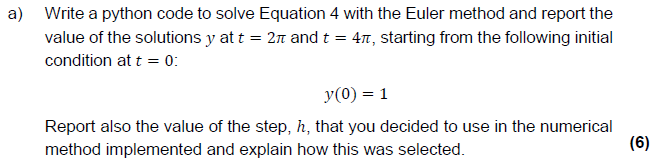

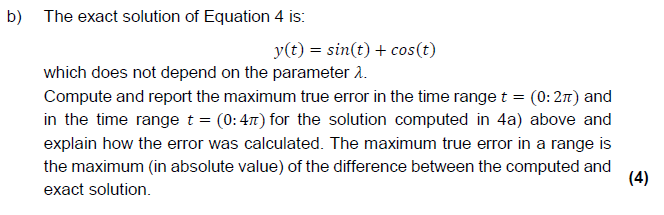

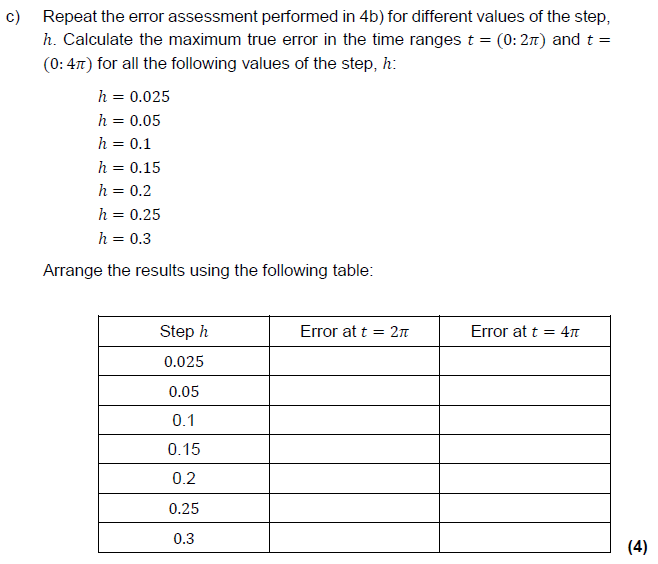

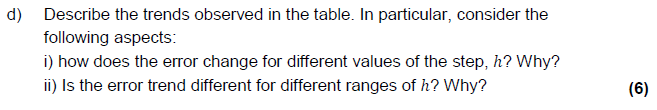